<b>Coding Assignment 3<br>
CS 401: Quantum Computing <br>
Dr. Kell, Spring 2023 </b>

<b> Instructions </b> 

To complete the assignment, please fill in all coding cells as instructed below, and then submit the file on Notebowl once completed. Before you turn in your submission, make sure everything runs as expected. First, restart the kernel (in the menubar, select Kernel → Restart) and then run all cells (in the menubar, select Cell → Run All). Make sure you fill in any place that says YOUR CODE GOES HERE.
    
<b> Constraints on references and collaborations</b>

<em>This is a Partner Assignment:</em> You will work on this assignment with a partner (submit one notebook file per group). 
    
 <item> <i> You and your partner may:</i> Reference any chapter from the course textbook, references, and relevant Wikipedia pages. You are permitted to discuss high-level ideas with other groups (but please do so sparringly). 
     
 <item> <i> You may not</i>: 
     
* You may not share code or work with other groups when writing your code.
<br> 
     
* Reference Qiskit's Deutsch-Jozsa guide (This is Chapter 3.2 in the Qiskit online textbook.)
    
<b> Finally: Be sure to use proper coding style for all your solutions!</b> For example, you should write docstrings for all functions, include useful in-line comments explaining how your code works, write clean code with readable variable names, etc.. You will lose points if you write sloppy code with poor style (e.g., not writing docstrings for any of your functions). 
    
Best of luck!


In [1]:
# Specify your names below
NAME1 = "Khoi Le"
NAME2 = "Tran Ong"

In [2]:
import numpy as np, cmath
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, assemble, Aer
from qiskit.quantum_info import Statevector
from qiskit.visualization import array_to_latex, state_visualization
from qiskit.visualization import plot_bloch_multivector, plot_histogram, plot_state_city 
import qis401 

## Part 1 [15 points] 
In this first part, you will implement the Deutsch-Jozsa algorithm using Qiskit.  You must structure your solution by implementing the following API:

* <code>make_constant(circ, x_reg, y_reg)</code>: Takes in a QuantumCircuit object <code>circ</code> and QuantuamRegisters <code>x_reg</code> and <code>y_reg</code> as parameters (n-qubit and 1-qubit registers, respectively). The function then updates <code>circ</code> to include gates that collectively implement the $U_f$ operator corresponding to the constant function $f(x)= 1$ for all $x$. The function should also call the <code>barrier()</code> method at the beginning and end of the function to block off $U_f$ gate portion of the circuit. Note there is a much simpler circuit implementation than the one given in the Lecture 15-16 Deutsch's Algorithm slides. In particular, think about how to implement the circuit using only X gate(s) and then generalize the method to work on $n$ qubits.


* <code>make_balanced(circ, x_reg, y_reg)</code>: Again takes in a QuantumCircuit <code>circ</code> and QuantuamRegisters <code>x_reg</code> and <code>y_reg</code> as parameters, and then adds the quantum gates that implement the $U_f$ gate corresponding to the balanced function $f(x)= 0$ if $x$ has an even number of 1s; otherwise $f(x)= 1$ (this is a generalization of the XOR function at the end of the Lecture 17-19 Deutsch-Jozsa slides; think about how to extend this circuit to work for $n$-qubits). Again, the function should also call the <code>barrier()</code> method at the beginning and end.


* <code>deutsch_jozsa(n, uf_maker)</code>: Takes in a positive int <code>n</code> (the number of qubits in the $x$ register) and a function <code>uf_maker</code>, the latter of which will either be the function <code>make_constant()</code> or <code>make_balanced()</code>. The function should then create and simulate a quantum circuit that implements the Deutsch-Jozsa algorithm, where the instructions for creating the $U_f$ gate is given by <code>uf_maker</code>. The function then returns a three tuple <code>(circ, answer, result)</code>, where <code>circ</code> is the QuantumCircuit object itself, <code>answer</code> is a string specifying the answer to the problem (either "Constant" or "Balanced"), and <code>result</code> is a Qiskit result object that is returned when calling <code>qis401.simulate_circuit()</code> on your circuit. 


Implement the above functions in a single cell. To generate your output, in subseqeunt cells call <code>deutsch_josza()</code> twice, passing in <code>make_constant()</code> for <code>uf_maker</code> for one call and  <code>make_balanced()</code> for the other (set $n = 5$ for both calls). For each call, write cell(s) that display both <code>circ</code> and <code>answer</code>. Then, call the function <code>plot_histogram()</code> on <code>result.get_counts()</code> to display the results of the simulation as histogram. (The measurement results for constant and balanced should be 00000 and 11111 for 100% of the simulations, respectively,). 


In [3]:
def make_constant(circ, x_reg, y_reg):
    """
    This function generate the U_f gate for the case of constant
    function f(x)=1. This simply creates an X gate for the (n+1)^th
    bit.

    Parameter:
        circ: the Quantum Circuit we are using
        x_reg: the Quantum Register for x.
        y_reg: the Quantum Register for y.
    """

    circ.barrier()
    circ.x(y_reg)
    circ.barrier()

def make_balanced(circ, x_reg, y_reg):
    """
    This function generate the U_f gate for the case of balanced
    function, or XOR function. This simply creates a sequence of
    controlled not gate on bit 0,1,...,n-1 and the target bit
    is the last bit.

    Parameter:
        circ: the Quantum Circuit we are using
        x_reg: the Quantum Register for x.
        y_reg: the Quantum Register for y.
    """
    
    circ.barrier()
    n = circ.num_qubits

    # Generate a sequence of controlled not gate corresponding to the bit 0,...,n-1
    for i in range(n-1):
        circ.cx(i, n-1)
        
    circ.barrier()

def deutsch_jozsa(n, uf_maker):
    """
    This function simulates the behavior of the Deutsch-Jozsa
    algorithm.

    Parameter:
        n: the number of bits for x. We will add one more bit for y.
        uf_maker: the type of function that we want to use.
    
    Return:
        circ: the circuit that the function created.
        answer: the answer corresponding to the function we use. Either "Balanced" or "Constant"
        result: the result of simulating the circuit.
    """
    
    # Initiate the circuit and its registers
    x_ref = QuantumRegister(n, "x")
    y_ref = QuantumRegister(1, "y")
    x_measure = ClassicalRegister(n, "x_measure")
    circ = QuantumCircuit(x_ref, y_ref, x_measure)
    # Apply x gate to y to initiate it as 1
    circ.x(y_ref)

    # Apply h gate to all registers
    circ.h(x_ref)
    circ.h(y_ref)

    # Apply the gate based on the function we use.
    uf_maker(circ, x_ref, y_ref)

    # Apply h gate to all x registers
    circ.h(x_ref)
    circ.measure(x_ref, x_measure)
    return circ, "Balanced" if uf_maker==make_balanced else "Constant", qis401.simulate_circuit(circ)

Constant


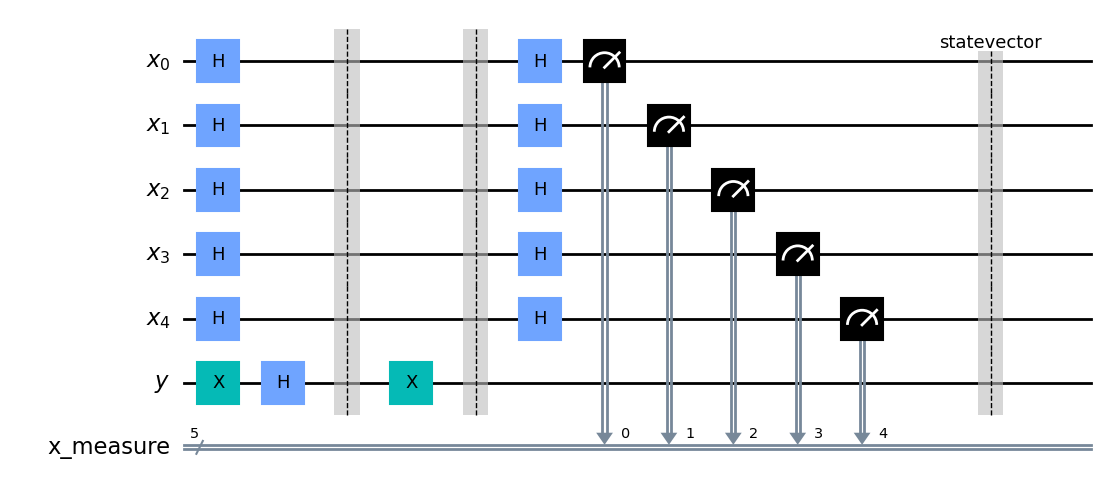

In [4]:
n = 5
circ, answer, result = deutsch_jozsa(n, make_constant)
print(answer)
circ.draw("mpl")

Constant


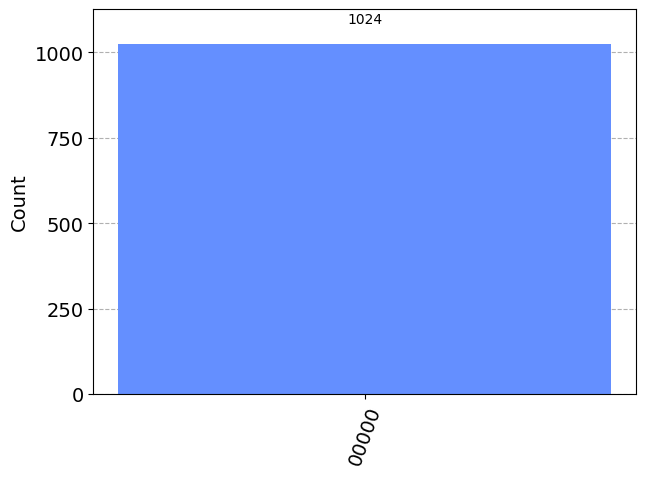

In [5]:
counts = result.get_counts(circ)
print(answer)
plot_histogram(counts)

Balanced


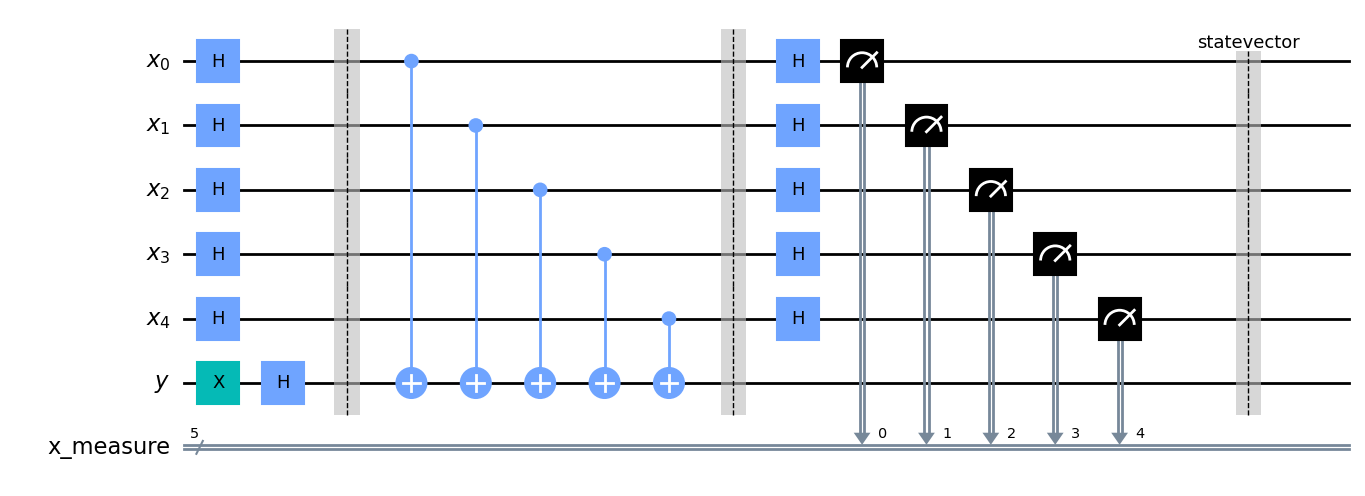

In [6]:
n = 5
circ, answer, result = deutsch_jozsa(n, make_balanced)
print(answer)
circ.draw("mpl")

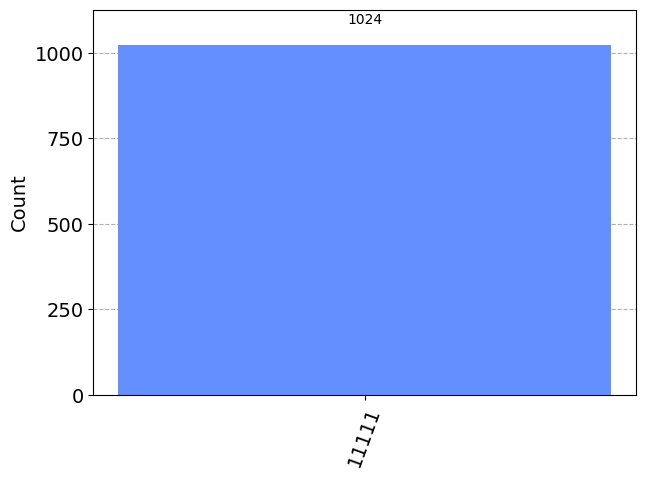

In [7]:
counts = result.get_counts(circ)
plot_histogram(counts)

## Part 2 [40 points] 

In the next two parts, you will now implement Deutsch-Jozsa using Numpy matrix operations. In this first part, you will write general purpose functions that create unitary matrices that correspond to gates in the algorithm. In particular, implement the following functions in the cell below. 

* <code>h_op(q, n):</code> Takes in ints <code>q</code> and <code>n</code>, and returns the $2^{n} \times 2^{n}$ unitary matrix that applies a Hadamard gate to the qth qubit (0-indexed). 


* <code>x_op(q, n):</code> Takes in ints <code>n</code> and <code>q</code>, and returns the $2^{n} \times 2^{n}$ unitary matrix that applies an X gate to the qth qubit (0-indexed). 


* <code>cx_op(q1, q2, n):</code> Takes in ints <code>q1</code>, <code>q2</code>, and <code>n</code>, and returns the $2^{n} \times 2^{n}$ unitary matrix that applies a CX gate with <code>q1</code> as the control qubit and <code>q2</code> as the target qubit. You must compute your answer using the method we saw in class via permutation matrices (this will be the bulk of the work for this part; feel free to write additional functions to aid with the calculation). <b>Note that your code must manually calculate the permutation matrices from scratch!</b> (You will  receive little/no credit on this function if you use some kind of built-in function in Qiskit, Numpy, etc. that essentially does the calculation for you.)

Note that for all functions above, $n$ refers to the number of qubits used in the circuit. (Keep in mind that in the context of the Deutsch-Jozsa problem, this value will be $n+1$.) 

In [8]:
# Declare the common gates: h, x, i, z.
h = np.array([[1/cmath.sqrt(2), 1/cmath.sqrt(2)], [1/cmath.sqrt(2), -1/cmath.sqrt(2)]])
x =  np.array([[0, 1], [1, 0]])
i =  np.array([[1, 0], [0, 1]])
z = np.array([[1, 0], [0, -1]])

# Declare the controlled not gate: cx1 is the gate where the first bit is the control bit,
# cx2 is the gate where the second bit is the control bit.
cx1 = np.array([[1, 0, 0, 0], [0, 1, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0]])
cx2 = np.array([[1, 0, 0, 0], [0, 0, 0, 1], [0, 0, 1, 0], [0, 1, 0, 0]])

In [9]:
def get_swapped(string, q1, q2):
    """
    This function takes the bit number in string and swap the bit at
    index q1 and q2 of the string. Then, it returns the int value of
    the swapped number.

    Parameter:
        string: the bit we want to perform swapping
        q1: the index of the bit we want to swap
        q2: the index to be swapped with q1
    """
    # Find the min and max between q1 and q2 to perform the swap.
    min_idx = min(q1,q2)
    max_idx = max(q1,q2)

    # Swap the min index with the max index
    new_string = string[:min_idx]+string[max_idx]+string[min_idx+1:max_idx]+string[min_idx]+string[max_idx+1:]
    return int(new_string, 2)

def h_op(q, n):
    """
    This function create an 2^n X 2^n matrix that applies the Hadamard operation on the q^th bit.

    Parameter:
        q: the bit to be applied Hadamard operation to.
        n: the size total number of bits.
    """
    # Initiate the matrix
    ans = i if q != 0 else h

    # Perform Kronecker Product to create our desired matrix.
    for j in range(1,n):
        if j == q:
            ans = np.kron(ans, h)
        else:
            ans = np.kron(ans, i)
    return ans

def x_op(q, n):
    """
    This function create an 2^n X 2^n matrix that applies the X gate on the q^th bit.

    Parameter:
        q: the bit to be applied Hadamard operation to.
        n: the size total number of bits.
    """
    # Initiate the matrix
    ans = i if q != 0 else x

    # Perform Kronecker Product to create our desired matrix.
    for j in range(1,n):
        if j == q:
            ans = np.kron(ans, x)
        else:
            ans = np.kron(ans, i)
    return ans

def cx_op(q1, q2, n):
    """
    This function create an 2^n X 2^n matrix that applies the Controlled not gate between q1 and q2 where
    the control bit is q1 and the target bit is q2.

    Parameter:
        q1: the control bit of the controlled not gate.
        q2: the target bit of the controlled not gate.
        n: the total number of bits of the matrix.
    """

    # Initiate the swap matrix by create an identity matrix
    swap_matrix = i
    for j in range(1,n):
        swap_matrix = np.kron(swap_matrix, i)
    matrix_size = np.shape(swap_matrix)[0]

    # Array to check if a row is swapped or not
    check = [False for j in range(matrix_size)]

    # Continuously swap the rows in the identity matrix to get the swap matrix.
    for j in range(matrix_size):
        if not check[j] and q1+1 != q2:
            swap_row = get_swapped(bin(j)[2:].zfill(n), q1+1, q2)
            check[j] = True
            check[swap_row] = True
            swap_matrix[[j, swap_row]] = swap_matrix[[swap_row, j]]

    # Initiate the controlled not gate on consecutive bits
    cx_gate = i if q1 != 0 else cx1
    counter = 1 if q1 != 0 else 2

    # Continuously perform Kronecker Product to obtain the desired Controlled not gate.
    while counter < n:
        if counter == q1:
            cx_gate = np.kron(cx_gate, cx1)
            counter += 2
        else:
            cx_gate = np.kron(cx_gate, i)
            counter += 1

    # Multiply the matrices to obtain the desired matrix for the Controlled not gate.
    return swap_matrix @ cx_gate @ swap_matrix


## Part 3 [20 points] 

You will now implement Deutsch-Jozsa using your API from Part 2. In particular, you should adapt the functions from Part 1 as follows. 

* <code>make_constant(n)</code>: Takes in an int <code>n</code> and returns the $2^{n+1} \times 2^{n+1}$ unitary matrix $U_f$ operator represented as a Numpy array. As in Part 1, the function $f$ used to define the operator must be the constant function $f(x)= 1$ for all $x$. 


* <code>make_balanced(n)</code>: Also takes in an int <code>n</code> and returns the $2^{n+1} \times 2^{n+1}$ unitary matrix for the $U_f$ operator represented as a Numpy array. Again as in Part 1, the function $f$ used to define the operator must be the balanced function $f(x)= 0$ if $x$ has an even number of 1s (otherwise $f(x)= 1$).


* <code>deutsch_jozsa(n, uf_maker)</code>: Takes in a positive int <code>n</code> and a function <code>uf_maker</code>. As in Part 1,  the passed in function <code>uf_maker</code> will either be <code>make_constant()</code> or <code>make_balanced()</code>. The function now returns a two tuple <code>(answer, final_state)</code>, where <code>answer</code> is still a string specifying the answer to the problem, and <code>final_state</code> is a Statevector object representing the final quantum state of the circuit before measurement.

Implement the above functions in a single cell. To generate your output, again call this version of the <code>deutsch_josza()</code> function twice in the cell(s) below, passing in <code>make_constant()</code> for <code>uf_maker</code> for one call and  <code>make_balanced()</code> for the other (again set $n = 5$ for both calls). In addition to printing the string <code>answer</code>, use the Statevector method <code>draw()</code> to display the final quantum state in bra-ket notation (the final states for these particular constant and balanced functions should be $-\frac{\sqrt{2}}{2}|000000\rangle + \frac{\sqrt{2}}{2}|000001\rangle$ and $\frac{\sqrt{2}}{2}|111110\rangle - \frac{\sqrt{2}}{2}|111111\rangle$, respectively).


In [10]:
def make_constant(n):
    """
    This function generate the matrix required for the U_f gate for the
    case of constant function by simply returning the X gate on the last
    bit.
    Parameter:
        n: the total number of bits.
    
    Return:
        ans: the matrix that perform the X gate on the last bit.
    """
    return x_op(n, n+1)

def make_balanced(n):
    """
    This function generate the matrix required for the U_f gate for the
    case of constant function by continuously creating a sequence of
    controlled not gate on bit 0,1,...,n-1 and the target bit is the last bit.
    Parameter:
        n: the total number of bits.
    
    Return:
        ans: the matrix that perform the sequence of controlled not gate.
    """
    # Initiate the matrix and continuously multiply it by consequence controlled not gate.
    ans = cx_op(0, n, n+1)
    for j in range(1, n):
        ans = cx_op(j, n, n+1) @ ans
    return ans

def deutsch_jozsa(n, uf_maker):
    """
    This function performs the Deutsch-Jozsa algorithm.
    Parameter:
        n: the number of bits of x.
        uf_maker: the type of function we want to use.
    
    Return:
        answer: the type of function we used. Either "Balanced" or "Constant"
        final_state: the final state after the gates of the algorithm
    """

    # Initiate the state, the second qubit is 1 since the initial state is
    # 00...01
    init_state = np.array([[1 if j == 1 else 0] for j in range(2**(n+1))])

    # Perform the H gate on every bit
    final_state = init_state
    for j in range(n+1):
        final_state = h_op(j, n+1) @ final_state

    # Apply the U_f gate based on the function
    final_state = uf_maker(n) @ final_state

    # Finally, perform the H gate on the first n bits to complete the algorithm
    for j in range(n):
        final_state = h_op(j, n+1) @ final_state

    return "Balanced" if uf_maker==make_balanced else "Constant", final_state

In [11]:
n = 5

answer, state = deutsch_jozsa(n, make_constant)
output_sv = Statevector(state)
output_sv.draw("latex")

<IPython.core.display.Latex object>

In [12]:
n = 5

answer, state = deutsch_jozsa(n, make_balanced)
output_sv = Statevector(state)
output_sv.draw("latex")

<IPython.core.display.Latex object>